In [4]:
# https://medium.com/@pablosjv/importing-local-python-modules-into-jupyter-notebooks-87336b2d7746
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('./')) # or the path to your source code
sys.path.insert(0, module_path)

# Defining the Main Class

In [15]:
# extending the Indiviudal class to make space for the function
from individual_class import IndividualPSO

class Rosenbrock(IndividualPSO):
  def _fitness_function(self,X,a=1,b=100):
    x,y = X
    return pow((a - x),2) + b * pow((y - x**2),2)

def ff(X,a=1,b=100):
  x,y = X
  return (a - x)**2 + b*(y - x**2)**2

In [16]:
final_table = {}
final_fitness_table = {}
final_fitness_table["mini"] = {}
final_fitness_table["mean"] = {}

### 1. Você deve gerar uma implementação do algoritmo PSO e u3lizar a função de Rosenbroack com 2 dimensões para teste.

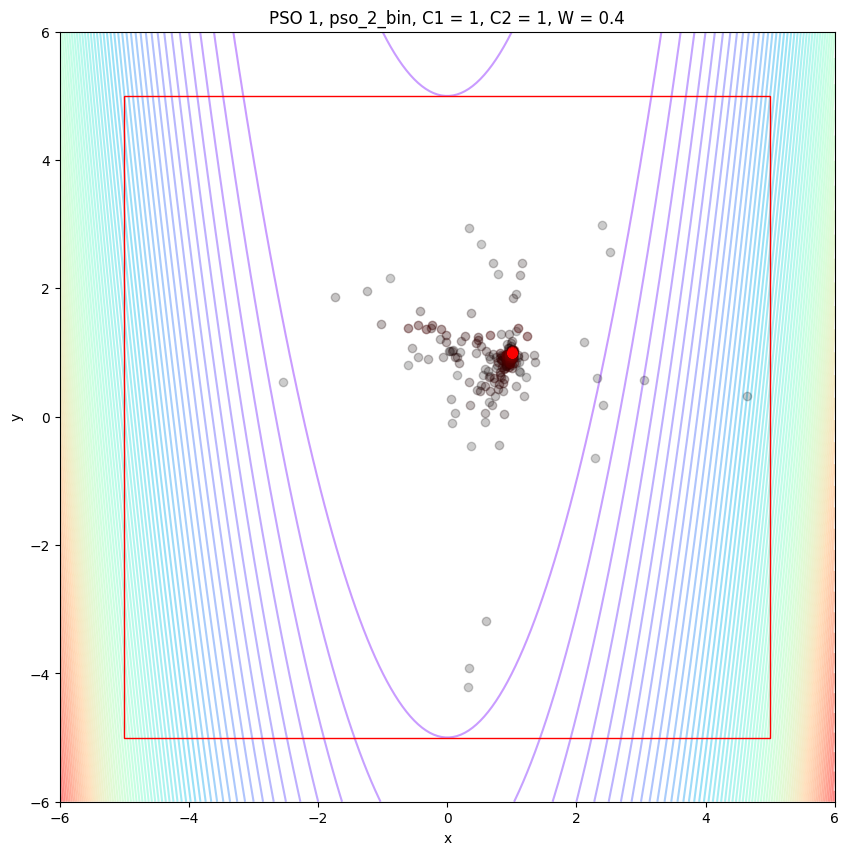

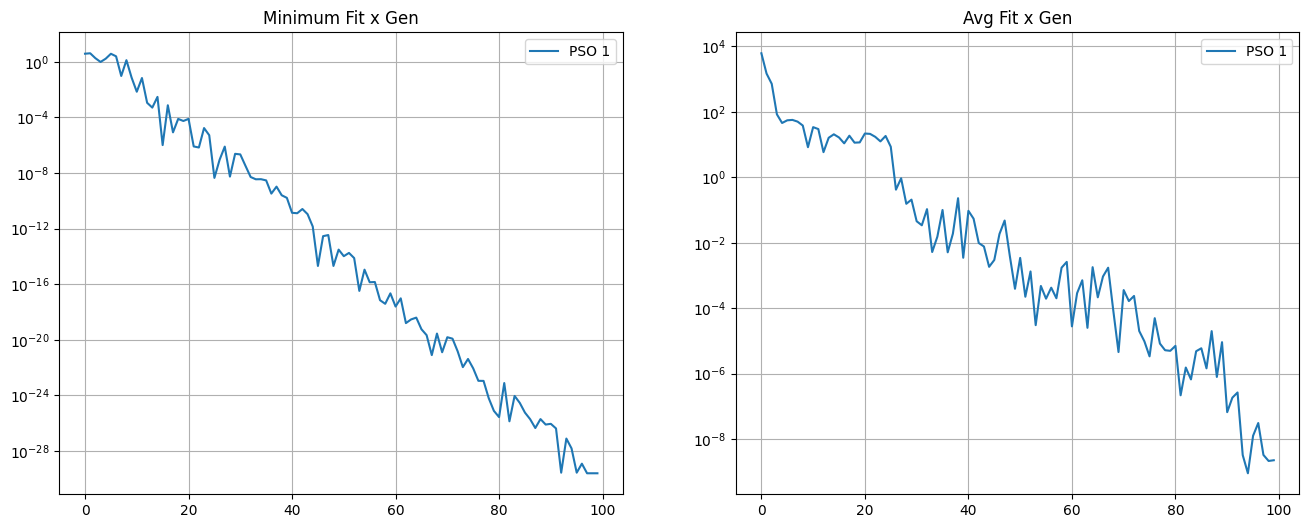

In [18]:
from graphical_visualization import get_last_best_ind
from graphical_visualization import store_average_fitness
from graphical_visualization import contour_over_population
from graphical_visualization import plot_fitness_over_generation

from algorithm_loop import particle_swarm_optimization
from algorithm_loop import initial_uniform_pop

c1_variable = 1
c2_variable = 1
w_variable = 0.4
bounds = [(-5,5)]
experiment_name="pso_2_bin"
option="PSO 1"

# initial and final pop stuff
population_size = 100
map_size = 10 # size of a square of the map
# slighty move center to avoid getting into the minimum too quickly
center = [0.3120312,0.2212314]
num_tests = 1 # number of tests to make
max_it = 100

final_table[option] = []
final_fitness_table["mini"][option] = []
final_fitness_table["mean"][option] = []

#------------------------------------------------------------#

lazy_title = [option,experiment_name,"C1 = "+str(c1_variable),"C2 = "+str(c2_variable),"W = "+str(w_variable)]
for _ in range(0,num_tests):
  coordinates = initial_uniform_pop(population_size,map_size,center)
  generation_data = particle_swarm_optimization(experiment_name,
                                                Rosenbrock,
                                                coordinates,
                                                max_it=max_it,
                                                C1=c1_variable,
                                                C2=c2_variable,
                                                w=w_variable)
  store_average_fitness(generation_data,final_fitness_table,option,num_tests)

contour_over_population(generation_data,', '.join(lazy_title),ff,map_size)
plot_fitness_over_generation(final_fitness_table)

### 2. Faça um experimento com 30 execuções independentes de seu algoritmo para gerar uma curva de convergência média.

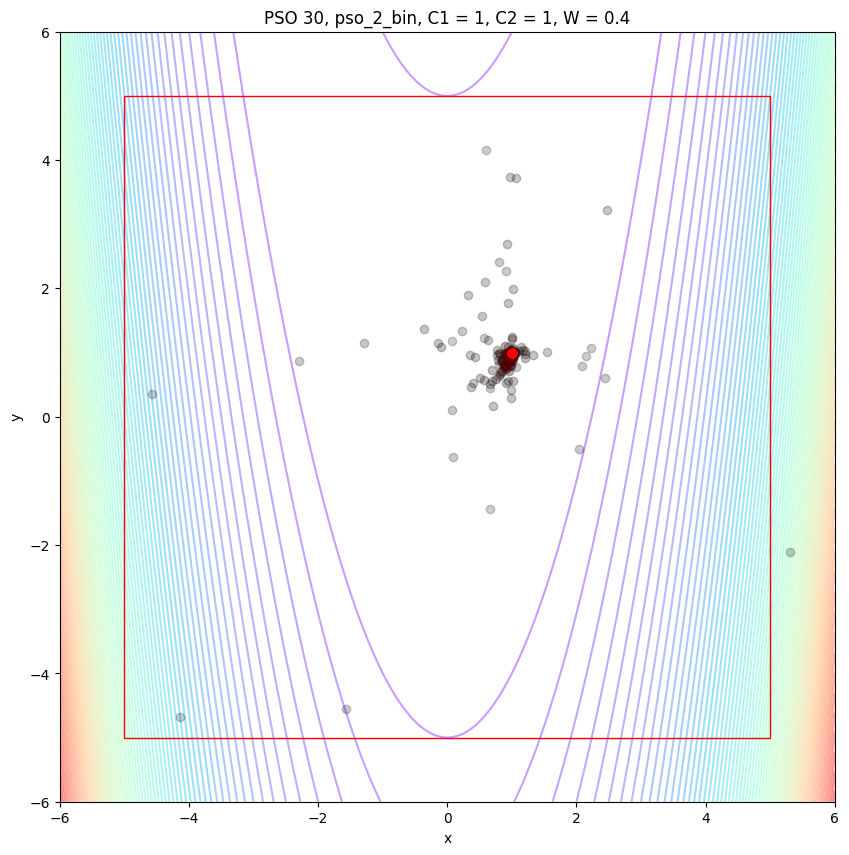

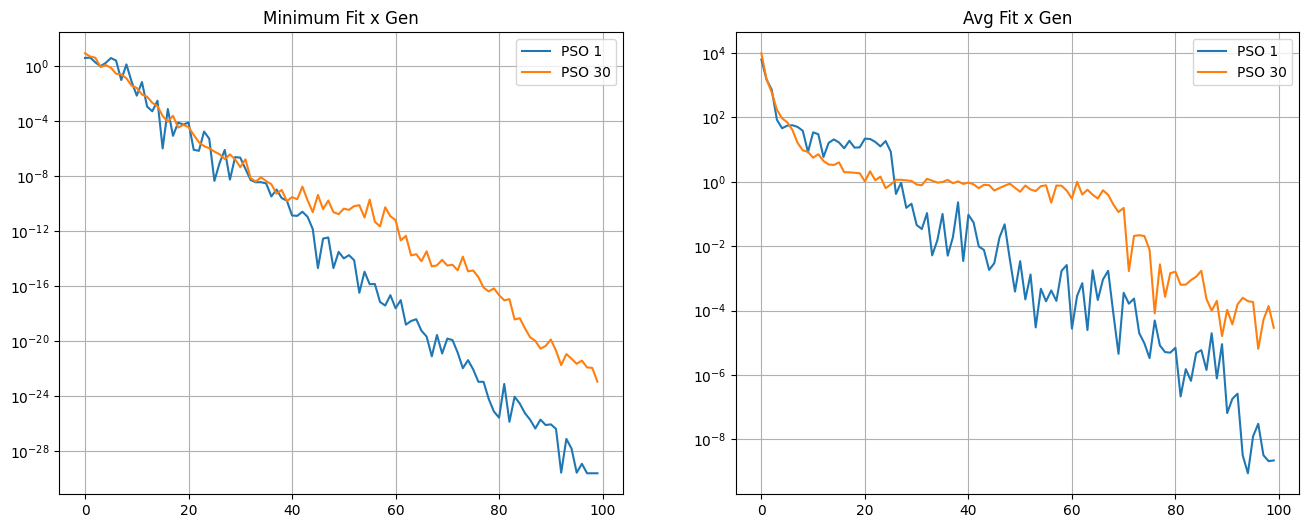

In [19]:
c1_variable = 1
c2_variable = 1
w_variable = 0.4
bounds = [(-5,5)]
experiment_name="pso_2_bin"
option="PSO 30"

# initial and final pop stuff
population_size = 100
map_size = 10 # size of a square of the map
# slighty move center to avoid getting into the minimum too quickly
center = [0.3120312,0.2212314]
num_tests = 30 # number of tests to make
max_it = 100

final_table[option] = []
final_fitness_table["mini"][option] = []
final_fitness_table["mean"][option] = []

#------------------------------------------------------------#

lazy_title = [option,experiment_name,"C1 = "+str(c1_variable),"C2 = "+str(c2_variable),"W = "+str(w_variable)]
for _ in range(0,num_tests):
  coordinates = initial_uniform_pop(population_size,map_size,center)
  generation_data = particle_swarm_optimization(experiment_name,
                                                Rosenbrock,
                                                coordinates,
                                                max_it=max_it,
                                                C1=c1_variable,
                                                C2=c2_variable,
                                                w=w_variable)
  store_average_fitness(generation_data,final_fitness_table,option,num_tests)

contour_over_population(generation_data,', '.join(lazy_title),ff,map_size)
plot_fitness_over_generation(final_fitness_table)

### 3. Você deve comparar seu algoritmo com as versões disponibilizadas da pymoo e pyswarms

#### pymoo

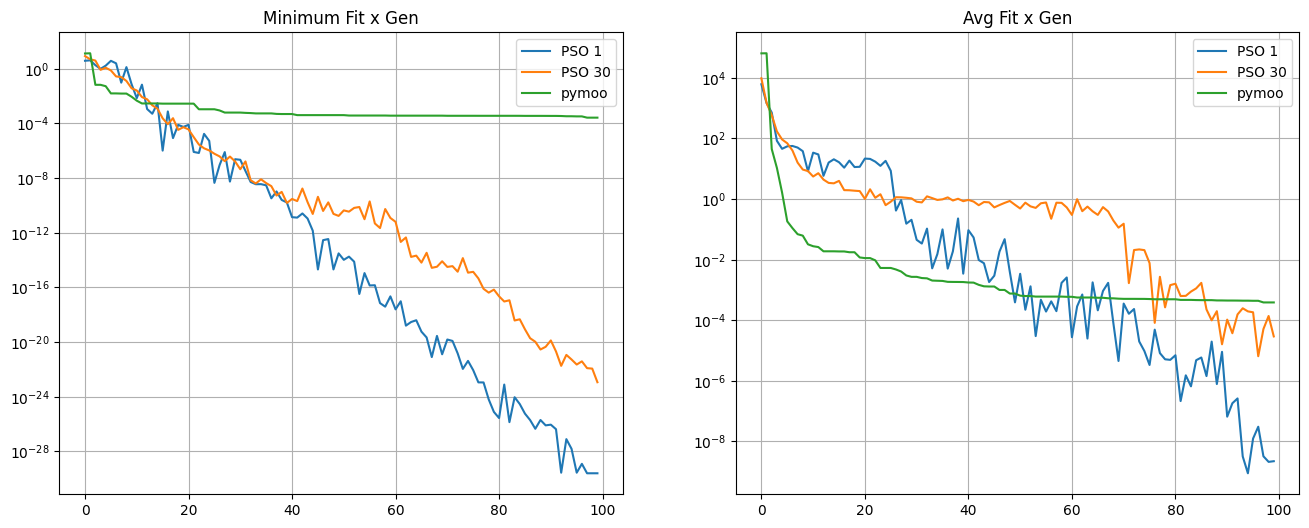

In [20]:
c1_variable = 1
c2_variable = 1
w_variable = 0.4
bounds = [(-5,5)]
experiment_name="pso_2_bin"
option="pymoo"

# initial and final pop stuff
population_size = 100
map_size = 10 # size of a square of the map
# slighty move center to avoid getting into the minimum too quickly
center = [0.3120312,0.2212314]
num_tests = 30 # number of tests to make
max_it = 100

final_table[option] = []
final_fitness_table["mini"][option] = []
final_fitness_table["mean"][option] = []

##################################################################
from pymoo.problems import get_problem
from pymoo.core.callback import Callback
from pymoo.algorithms.soo.nonconvex.pso import PSO
from pymoo.optimize import minimize
from algorithm_loop import initial_uniform_pop
from graphical_visualization import store_fitness_pymoo
import numpy as np

class MyCallback(Callback):
    def __init__(self) -> None:
        super().__init__()
        self.data["min"] = []
        self.data["avg"] = []
    def notify(self, algorithm):
        self.data["min"].append(algorithm.pop.get("F").min())
        self.data["avg"].append(algorithm.pop.get("F").mean())

problem = get_problem("rosenbrock", n_var=2)
algorithm = PSO(
    pop_size=population_size,
    callback=MyCallback(),
    sampling=np.array(initial_uniform_pop(population_size,map_size,center,numpy_array=False))
)

res = minimize(problem,
               algorithm,
               seed=1,
               verbose=False)

# Run the optimization
for i in range(0,num_tests):
  res = minimize(problem,algorithm,seed=i,termination=('n_gen',max_it),verbose=False)
  store_fitness_pymoo(res.algorithm.callback.data,final_fitness_table,option,num_tests)

plot_fitness_over_generation(final_fitness_table)

#### pyswarm

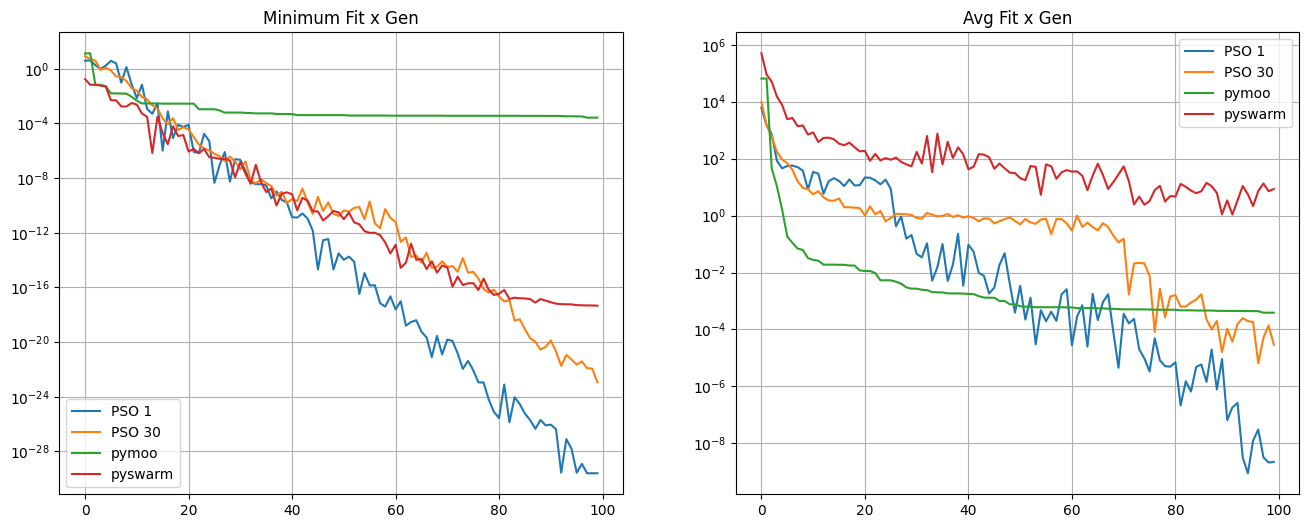

In [21]:

# Import modules
import numpy as np

# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)
from graphical_visualization import store_fitness_pyswarm



# initial and final pop stuff
population_size = 100
map_size = 10 # size of a square of the map
# slighty move center to avoid getting into the minimum too quickly
center = [0.3120312,0.2212314]
num_tests = 30 # number of tests to make
max_it = 100

# Set-up hyperparameters
c1_variable = 1
c2_variable = 1
w_variable = 0.4
option="pyswarm"

final_table[option] = []
final_fitness_table["mini"][option] = []
final_fitness_table["mean"][option] = []

x_max = 10 * np.ones(2)
x_min = -1 * x_max
bounds = (x_min, x_max)
options = {'c1': c1_variable, 'c2': c2_variable, 'w':w_variable}

def rosenbrock_pyswarm(x, a=1, b=100, c=0):
    f = (a - x[:, 0]) ** 2 + b * (x[:, 1] - x[:, 0] ** 2) ** 2 + c
    return f 

# Call instance of PSO
for i in range(0,num_tests):
    optimizer = ps.single.GlobalBestPSO(n_particles=population_size, dimensions=2, options=options, bounds=bounds)
    cost, pos = optimizer.optimize(rosenbrock_pyswarm, iters=max_it, verbose=False)
    store_fitness_pyswarm(optimizer.pos_history,ff,final_fitness_table,option,num_tests)

plot_fitness_over_generation(final_fitness_table)


### Além da experimentação com a função de rosenbroack, você deve verificar o comportamento das três versões implementadas por você no estudo de cado de um pequeno circuito elétrico, disponível em:

In [23]:
# Main class
from individual_class import IndividualPSO

class CostFunction(IndividualPSO):
    def _fitness_function(self,I):
        U = 10
        R = 100
        I_s = 9.4e-12
        v_t = 25.85e-3
        c = abs(U - v_t * np.log(abs(I / I_s)) - R * I)
        return c

def ff(I):
    U = 10
    R = 100
    I_s = 9.4e-12
    v_t = 25.85e-3
    c = abs(U - v_t * np.log(abs(I / I_s)) - R * I)
    return c

# @title Generating Final Table
final_table = {}
final_fitness_table = {}
final_fitness_table["mini"] = {}
final_fitness_table["mean"] = {}

#--------------------------------------------------------#
# Pop generator
#--------------------------------------------------------#

def initial_uniform_pop_1d(pop_size,map_size,center,numpy_array=True):
  coordinates = []
  sqrt = math.sqrt
  floor = math.floor

  step = map_size/(sqrt(pop_size)-1)

  for i in range(floor(sqrt(pop_size))):
      x = i * step - abs(map_size)/2 + center[0]
      if numpy_array:
        X = np.array([x])
      else:
        X = [x]
      coordinates.append(X)

  return coordinates




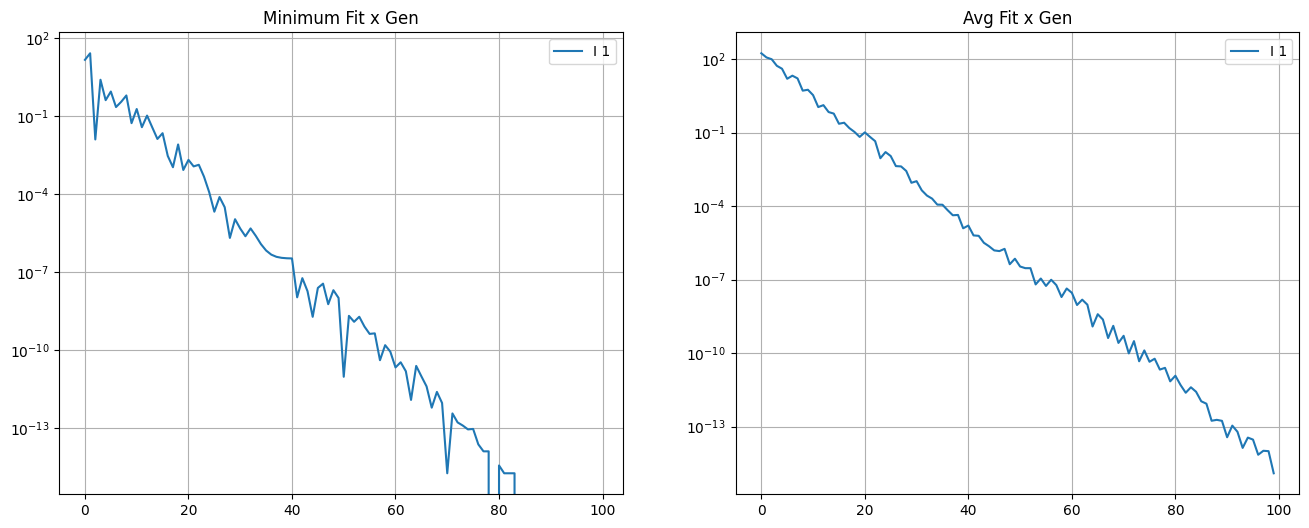

In [27]:
c1_variable = 1
c2_variable = 1
w_variable = 0.4
bounds = [(-5,5)]
experiment_name="pso_2_bin"
option="I 1"

# initial and final pop stuff
population_size = 100
map_size = 10 # size of a square of the map
# slighty move center to avoid getting into the minimum too quickly
center = [0.3120312,0.2212314]
num_tests = 1 # number of tests to make
max_it = 100

final_table[option] = []
final_fitness_table["mini"][option] = []
final_fitness_table["mean"][option] = []

#------------------------------------------------------------#

lazy_title = [option,experiment_name,"C1 = "+str(c1_variable),"C2 = "+str(c2_variable),"W = "+str(w_variable)]
for _ in range(0,num_tests):
  coordinates = initial_uniform_pop(population_size,map_size,center,dimensions=1)
  generation_data = particle_swarm_optimization(experiment_name,
                                                CostFunction,
                                                coordinates,
                                                max_it=max_it,
                                                C1=c1_variable,
                                                C2=c2_variable,
                                                w=w_variable)
  best_ind = get_last_best_ind(generation_data,*lazy_title,population_size,max_it)
  store_average_fitness(generation_data,final_fitness_table,option,num_tests)
  final_table[option].append(best_ind)

plot_fitness_over_generation(final_fitness_table)

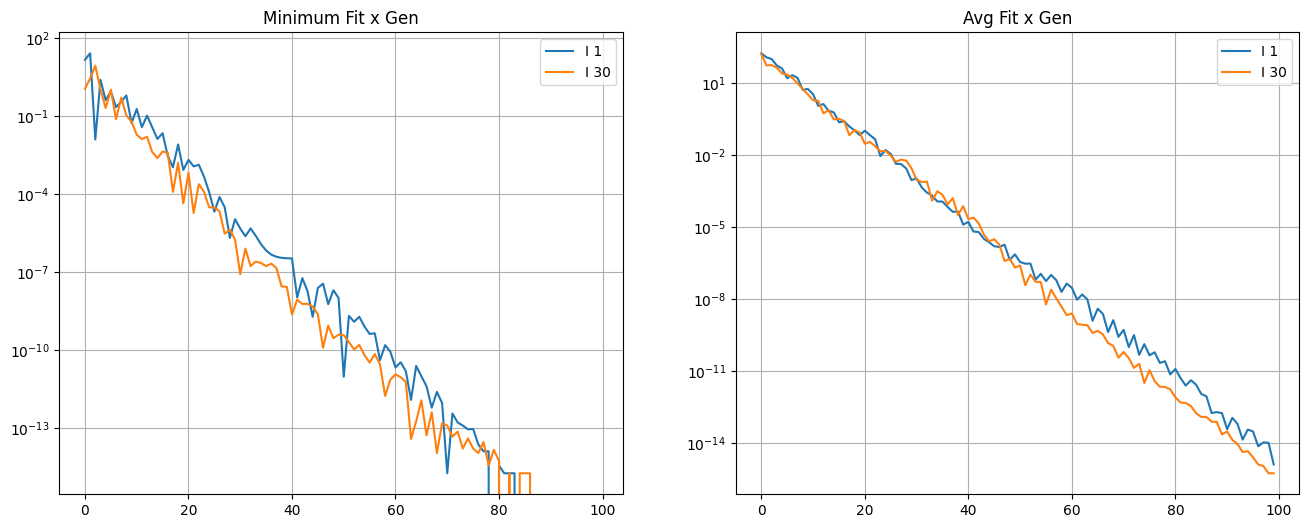

best fitness and position
[array([0.09404769]), array([0.])]


In [28]:
c1_variable = 1
c2_variable = 1
w_variable = 0.4
bounds = [(-5,5)]
experiment_name="pso_2_bin"
option="I 30"

# initial and final pop stuff
population_size = 100
map_size = 10 # size of a square of the map
# slighty move center to avoid getting into the minimum too quickly
center = [0.3120312,0.2212314]
num_tests = 1 # number of tests to make
max_it = 100

final_table[option] = []
final_fitness_table["mini"][option] = []
final_fitness_table["mean"][option] = []

#------------------------------------------------------------#

lazy_title = [option,experiment_name,"C1 = "+str(c1_variable),"C2 = "+str(c2_variable),"W = "+str(w_variable)]
for _ in range(0,num_tests):
  coordinates = initial_uniform_pop(population_size,map_size,center,dimensions=1)
  generation_data = particle_swarm_optimization(experiment_name,
                                                CostFunction,
                                                coordinates,
                                                max_it=max_it,
                                                C1=c1_variable,
                                                C2=c2_variable,
                                                w=w_variable)
  best_ind = get_last_best_ind(generation_data,*lazy_title,population_size,max_it)
  store_average_fitness(generation_data,final_fitness_table,option,num_tests)
  final_table[option].append(best_ind)

plot_fitness_over_generation(final_fitness_table)
best = min(generation_data[99],key=lambda x: x.getFitness())
print("best fitness and position")
best.print()